In [23]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
f = h5py.File('./train_catvnoncat.h5', 'r')

%matplotlib inline

Is this a cat?   NO


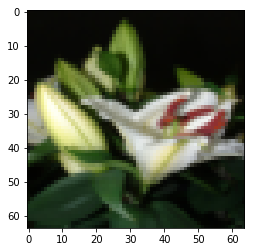

In [24]:
# Loading the data (cat/non-cat)

train_set_x_orig, train_set_y, classes = np.array(f['train_set_x']), np.array(f['train_set_y']), np.array(f['list_classes'])

test_set_x_orig, test_set_y = train_set_x_orig[-50:], train_set_y[-50:]
randindex = np.random.randint(6)
plt.imshow(train_set_x_orig[randindex])
print('Is this a cat?   '+('YES' if train_set_y[randindex] else 'NO'))

train_set_x_orig.reshape((1,-1))
train_set_y = train_set_y.reshape((1,-1))
test_set_y = test_set_y.reshape((1,-1))

In [25]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [26]:
# Flatten the images
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [27]:
# Standardize the dataset
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [29]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [30]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    
    w = np.zeros(shape=(X_train.shape[0], 1))
    b = 0
    costs = []
    m = X_train.shape[1]
    for i in range(num_iterations):
        A = sigmoid(np.dot(w.T, X_train) + b)
        cost = (-1/m) * (np.sum(Y_train * np.log(A) + (1 - Y_train) * np.log(1 - A)))
        dw = (1/m) * np.dot(X_train, (A - Y_train).T)
        db = (1/m) * np.sum(A - Y_train)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i%100 == 0:
            print("Cost after iteration {0}: {1}".format(i, cost))
#         del A, cost, dw, db
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [31]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5845083636993086
Cost after iteration 200: 0.46694904094655476
Cost after iteration 300: 0.37600686694802077
Cost after iteration 400: 0.3314632893282513
Cost after iteration 500: 0.30327306747438293
Cost after iteration 600: 0.2798795865826048
Cost after iteration 700: 0.26004213692587574
Cost after iteration 800: 0.24294068467796623
Cost after iteration 900: 0.22800422256726066
Cost after iteration 1000: 0.21481951378449635
Cost after iteration 1100: 0.20307819060644985
Cost after iteration 1200: 0.1925442771670686
Cost after iteration 1300: 0.18303333796883503
Cost after iteration 1400: 0.17439859438448876
Cost after iteration 1500: 0.16652139705400335
Cost after iteration 1600: 0.15930451829756614
Cost after iteration 1700: 0.15266732471296504
Cost after iteration 1800: 0.1465422350398234
Cost after iteration 1900: 0.14087207570310162
train accuracy: 99.04306220095694 %
test accuracy: 100.0 %


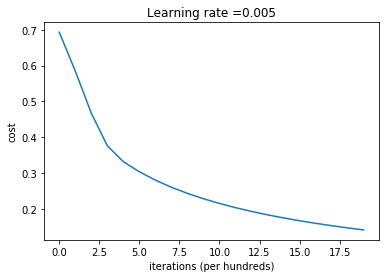

In [32]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 100.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 92.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 66.0 %

-------------------------------------------------------



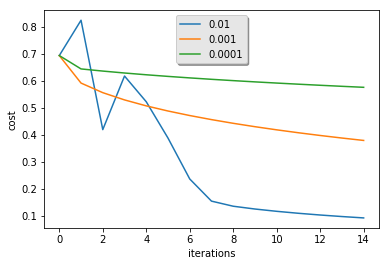

In [33]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()